<a href="https://colab.research.google.com/github/aryaayush190/Maths-for-Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

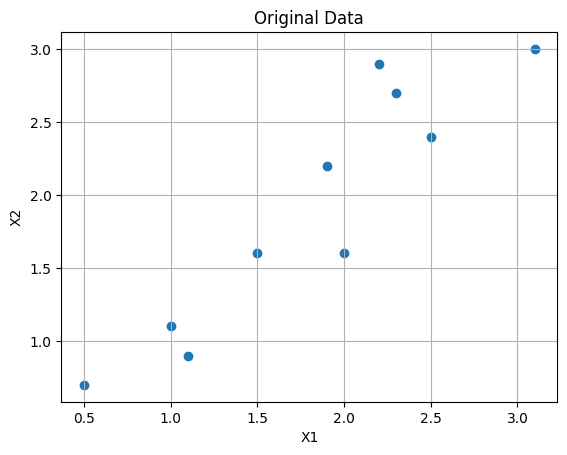

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# original data
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.grid(True)
plt.show()


In [2]:
# Step 1: Mean centering
X_meaned = X - np.mean(X, axis=0)

print("Mean centered data:\n", X_meaned[:5])


Mean centered data:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]]


In [3]:
# Step 2: Covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)
print("Covariance Matrix:\n", cov_mat)


Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [4]:
# Step 3: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vectors)


Eigenvalues:
 [0.0490834  1.28402771]
Eigenvectors:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


In [5]:
# Step 4: Sort eigenvectors
# Get indices of sorted eigenvalues (descending)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues:
 [1.28402771 0.0490834 ]
Sorted Eigenvectors:
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


In [6]:
# Step 5: Pick top k eigenvectors (here k=1)
n_components = 1
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
print("Top eigenvector:\n", eigenvector_subset)


Top eigenvector:
 [[-0.6778734 ]
 [-0.73517866]]


In [7]:
# Step 6: Transform the data
X_reduced = np.dot(X_meaned, eigenvector_subset)
print("Reduced Data:\n", X_reduced[:5])


Reduced Data:
 [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]]


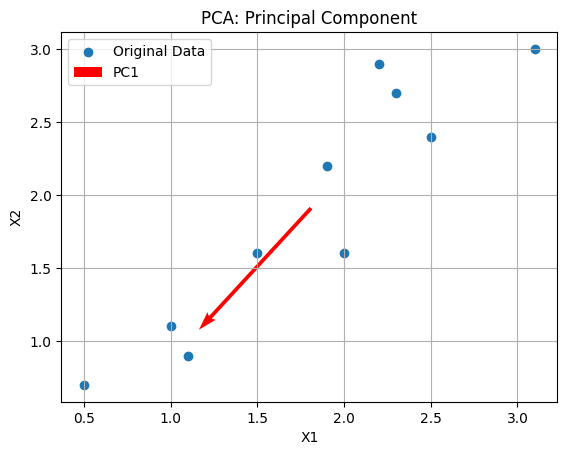

In [8]:
# Plot original data and principal component
plt.scatter(X[:,0], X[:,1], label='Original Data')
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]),
           eigenvector_subset[0], eigenvector_subset[1],
           scale=3, color='r', label='PC1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA: Principal Component')
plt.legend()
plt.grid(True)
plt.show()
